In [0]:
import tensorflow as tf
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!7z x fer2013.csv.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 101279952 bytes (97 MiB)

Extracting archive: fer2013.csv.zip
--
Path = fer2013.csv.zip
Type = zip
Physical Size = 101279952

  0%      7% - fer2013.csv                   14% - fer2013.csv                   22% - fer2013.csv                   29% - fer2013.csv                   37% - fer2013.csv                   43% - fer2013.csv                   50% - fer2013.csv                   57% - fer2013.csv                   64% - 

In [0]:
training_data = pd.read_csv('fer2013.csv',',')
emotion = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

In [4]:
training_data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [0]:
training_data = pd.get_dummies(training_data,columns = ['emotion'] )

In [6]:
training_data.head()

,pixels,Usage,emotion_0,emotion_1,emotion_2,emotion_3,emotion_4,emotion_5,emotion_6
0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,1,0,0,0,0,0,0
1,151 150 147 155 148 133 111 140 170 174 182 15...,Training,1,0,0,0,0,0,0
2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,0,0,1,0,0,0,0
3,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,0,0,0,0,1,0,0
4,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,0,0,0,0,0,0,1


In [0]:
training = training_data[training_data['Usage'] == 'Training']
test = training_data[training_data['Usage'] == 'PublicTest']
t = training['pixels']
X_train = []
for x in t:
  temp = x.split(' ')
  temp = [int(_) for _ in temp]
  temp = np.array(temp)
  temp = temp.reshape(48,48)
  temp  = temp/255 
  X_train.append(temp)
X_test = []
t = test['pixels']
for x in t:
  temp = x.split(' ')
  temp = [int(_) for _ in temp]
  temp = np.array(temp)
  temp = temp.reshape(48,48)
  temp  = temp/255 
  X_test.append(temp)


In [8]:
y_test = training_data[training_data['Usage'] == 'PublicTest'].drop(['pixels','Usage'],axis=1)
y_train = training_data[training_data['Usage'] == 'Training'].drop(['pixels','Usage'],axis=1)
print(y_test)

       emotion_0  emotion_1  emotion_2  ...  emotion_4  emotion_5  emotion_6
28709          1          0          0  ...          0          0          0
28710          0          1          0  ...          0          0          0
28711          0          0          0  ...          1          0          0
28712          0          0          0  ...          0          0          1
28713          0          0          0  ...          0          0          0
28714          0          0          0  ...          0          0          0
28715          0          0          1  ...          0          0          0
28716          1          0          0  ...          0          0          0
28717          0          0          1  ...          0          0          0
28718          1          0          0  ...          0          0          0
28719          0          0          0  ...          0          0          0
28720          1          0          0  ...          0          0          0

In [0]:
X_train = np.array(list(np.array(X_train))).reshape(-1,48,48,1)
X_test = np.array(list(np.array(X_test))).reshape(-1,48,48,1)

In [10]:
s = y_train.sum(axis=0)
print(s)

emotion_0    3995
emotion_1     436
emotion_2    4097
emotion_3    7215
emotion_4    4830
emotion_5    3171
emotion_6    4965
dtype: int64


In [11]:
y_train.shape

(28709, 7)

In [12]:
X_train.shape

(28709, 48, 48, 1)

# **Shallow CNN**

In [13]:
from tensorflow.keras.layers import Conv2D,BatchNormalization,MaxPooling2D,Dense,Dropout,SpatialDropout2D,Flatten
model = tf.keras.models.Sequential()
model.add(Conv2D(16, kernel_size=3, activation='relu', padding="same", input_shape=(48,48,1)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SpatialDropout2D(0.5))


model.add(Conv2D(64, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(64, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SpatialDropout2D(0.5))
model.add(Flatten())

model.add(Dense(128,activation = 'relu'))


model.add(Dense(7,activation = 'softmax'))

W0727 14:26:55.297372 140687065642880 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 16)        2320      
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        9280      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        3

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [16]:
model.fit(X_train,y_train,epochs=25,batch_size=128,validation_split=0.1,shuffle=True)

Train on 25838 samples, validate on 2871 samples
Epoch 1/25
25838/25838 [==============================] - 9s 335us/sample - loss: 1.9054 - acc: 0.2711 - val_loss: 3.1533 - val_acc: 0.1721
Epoch 2/25
25838/25838 [==============================] - 5s 179us/sample - loss: 1.6504 - acc: 0.3400 - val_loss: 2.7297 - val_acc: 0.2473
Epoch 3/25
25838/25838 [==============================] - 5s 175us/sample - loss: 1.5723 - acc: 0.3851 - val_loss: 1.5184 - val_acc: 0.4040
Epoch 4/25
25838/25838 [==============================] - 5s 178us/sample - loss: 1.5216 - acc: 0.4064 - val_loss: 1.4632 - val_acc: 0.4197
Epoch 5/25
25838/25838 [==============================] - 5s 179us/sample - loss: 1.4766 - acc: 0.4207 - val_loss: 1.3985 - val_acc: 0.4483
Epoch 6/25
25838/25838 [==============================] - 5s 178us/sample - loss: 1.4391 - acc: 0.4399 - val_loss: 1.3533 - val_acc: 0.4768
Epoch 7/25
25838/25838 [==============================] - 5s 178us/sample - loss: 1.3972 - acc: 0.4632 - val_lo

In [0]:
y_pred = model.predict(X_test)
y_predicted = y_pred.argmax(axis=1)
y_test = np.array(y_test).argmax(axis=1)

Probabilities are:-  [4.4505429e-02 1.3267386e-05 3.1077214e-02 3.3932258e-03 1.8590720e-01
 1.0040798e-03 7.3409951e-01]
Predicted Emotion:- Neutral
Original Emotion:- Neutral


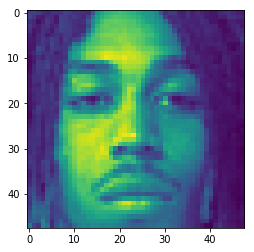

In [73]:
img=2223
plt.imshow(X_test[img].reshape(48,48))
print("Probabilities are:- ",y_pred[img])
print("Predicted Emotion:- "+emotion[y_predicted[img]])
print("Original Emotion:- "+emotion[y_test[img]])


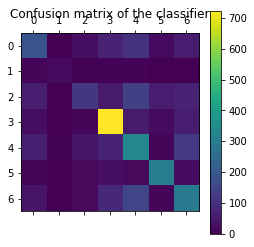

accuracy= 0.5567010309278351
Recall= 0.5138325592843008
F1 Score= 0.5270223949155642
Precision= 0.5731446547666288


In [28]:
plt.matshow(confusion_matrix(y_test,y_predicted))
plt.title('Confusion matrix of the classifier')
plt.colorbar()
plt.show()
print("accuracy= "+str(accuracy_score(y_test,y_predicted)))
print("Recall= "+str(recall_score(y_test,y_predicted,average='macro')))
print("F1 Score= "+str(f1_score(y_test,y_predicted,average='macro')))
print("Precision= "+str(precision_score(y_test,y_predicted,average='macro')))

In [0]:
shallow_weights = model.save_weights("shallow weights")

# **Deep CNN** 

In [74]:
from tensorflow.keras.regularizers import l1
model = tf.keras.models.Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', padding="same", input_shape=(48,48,1),kernel_regularizer=l1(1e-6)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5), activation='relu', padding='same',kernel_regularizer=l1(1e-6)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same',kernel_regularizer=l1(1e-6)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same',kernel_regularizer=l1(1e-6)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SpatialDropout2D(0.5))
model.add(Flatten())

model.add(Dense(256,activation = 'relu',kernel_regularizer=l1(1e-6)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(512,activation = 'relu',kernel_regularizer=l1(1e-6)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(7,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 128)      

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [76]:
model.fit(X_train,y_train,epochs=40,batch_size=128,validation_split=0.1,shuffle=True)

Train on 25838 samples, validate on 2871 samples
Epoch 1/40
25838/25838 [==============================] - 19s 723us/sample - loss: 2.3306 - acc: 0.2107 - val_loss: 2.6531 - val_acc: 0.2421
Epoch 2/40
25838/25838 [==============================] - 15s 592us/sample - loss: 1.9707 - acc: 0.2676 - val_loss: 2.4762 - val_acc: 0.1641
Epoch 3/40
25838/25838 [==============================] - 15s 587us/sample - loss: 1.7043 - acc: 0.3766 - val_loss: 1.9954 - val_acc: 0.2748
Epoch 4/40
25838/25838 [==============================] - 15s 585us/sample - loss: 1.5433 - acc: 0.4438 - val_loss: 1.6389 - val_acc: 0.4100
Epoch 5/40
25838/25838 [==============================] - 15s 587us/sample - loss: 1.4299 - acc: 0.4856 - val_loss: 1.4084 - val_acc: 0.4883
Epoch 6/40
25838/25838 [==============================] - 15s 588us/sample - loss: 1.3520 - acc: 0.5116 - val_loss: 1.3578 - val_acc: 0.5155
Epoch 7/40
25838/25838 [==============================] - 15s 587us/sample - loss: 1.3073 - acc: 0.5330 -

In [0]:
y_pred = model.predict(X_test)
y_predicted = y_pred.argmax(axis=1)

Probabilities are:-  [0.0547498  0.0011597  0.2676292  0.63115424 0.00178509 0.04165595
 0.001866  ]
Predicted Emotion:- Happy
Original Emotion:- Happy


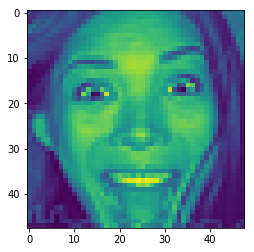

In [83]:
img=1112

plt.imshow(X_test[img].reshape(48,48))
print("Probabilities are:- ",y_pred[img])
print("Predicted Emotion:- "+emotion[y_predicted[img]])
print("Original Emotion:- "+emotion[y_test[img]])


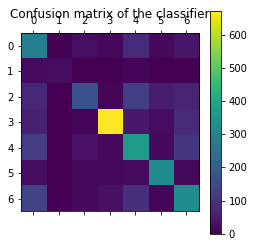

accuracy= 0.6035107272220674
Recall= 0.5710863149835881
F1 Score= 0.5824013856532421
Precision= 0.6291548753230377


In [85]:
plt.matshow(confusion_matrix(y_test,y_predicted))
plt.title('Confusion matrix of the classifier')
plt.colorbar()
plt.show()
print("accuracy= "+str(accuracy_score(y_test,y_predicted)))
print("Recall= "+str(recall_score(y_test,y_predicted,average='macro')))
print("F1 Score= "+str(f1_score(y_test,y_predicted,average='macro')))
print("Precision= "+str(precision_score(y_test,y_predicted,average='macro')))

In [0]:
deep_weights = model.save_weights("deep weights")